In [ ]:
# default_exp experiments

In [ ]:
#hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Experiments

> API details.

In [ ]:
# export
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import tensorflow as tf

from ds4se.mgmnt.prep.i import jsonl_list_to_dataframe, get_dfs
from icodegen.model import *
from pathlib import Path
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
path = Path('/home/nathan/Downloads/')

In [ ]:
df_trn, df_val, df_tst = get_dfs(path/"java/final/jsonl")
df_trn.head()

,code,docstring
0,protected final void bindIndexed(Configuration...,Bind indexed elements to the supplied collecti...
1,public void setServletRegistrationBeans(\n\t\t...,Set {@link ServletRegistrationBean}s that the ...
2,public void addServletRegistrationBeans(\n\t\t...,Add {@link ServletRegistrationBean}s for the f...
3,public void setServletNames(Collection<String>...,Set servlet names that the filter will be regi...
4,public void addServletNames(String... servletN...,Add servlet names for the filter.\n@param serv...


In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
trnsfr = TFGPT2LMHeadModel.from_pretrained('gpt2')
model = TransformerModel(tokenizer, trnsfr)

All model checkpoint weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
# export
# TODO: make it specific for types of tokens because this just gets overall mean regardless of if the tokens was in the method and therefore could tank the mean prob for that token
def get_mean_probs(df, model):
    mean_probs = []
    for mthd in df.code.values[:10]:
        probs = model.get_probs(mthd)[0]
        mean_prob = tf.math.reduce_mean(probs, axis = 0)
        mean_probs.append(mean_prob)
    
    mean_probs = tf.convert_to_tensor(mean_probs)
    mean_probs = tf.reduce_mean(mean_probs, axis = 0)
    return mean_probs

In [ ]:
mean_probs = get_mean_probs(df_trn, model).numpy(); mean_probs

array([2.1428997e-02, 1.8236816e-03, 2.6314210e-05, ..., 8.8622903e-07,
       6.6110613e-07, 3.8686435e-04], dtype=float32)

&lt;BarContainer object of 10 artists&gt;

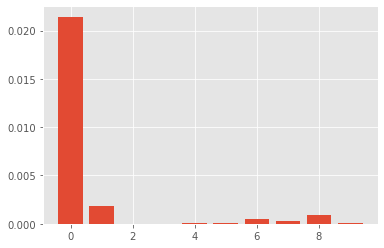

In [ ]:
plt.bar(range(10), mean_probs[:10])

In [ ]:
k = 10
top_k = np.argpartition(mean_probs, -k)[-k:]; top_k
top_probs = mean_probs[top_k]

&lt;BarContainer object of 10 artists&gt;

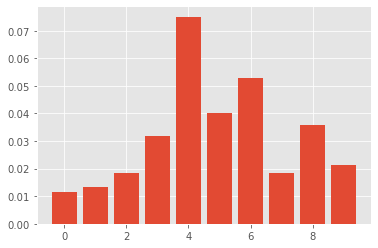

In [ ]:
plt.bar(range(10), top_probs)